# Evolutionary computation 
### Solution to the eight queens problem with evolutionary algorithm

Genotype is array (size 8)  
Population: 100  
Mutation probability: 0.1%    
Crossover probability: 70%  
Terminal conditions: 100 generations  
Operators:  
Crossover: Single point crossover    
Mutation: One point mutation  
Selection: Roulette-wheel sampling  


In [6]:
import random
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import time

queens = 8

def evaluation(individual):
    size = len(individual)
    sum = 0
    for i in range(size):
        for j in range(i+1, size):
            if individual[i] == individual[j]:
                sum += 2
            elif abs(individual[i] - individual[j])==abs(i-j):
                sum += 2           
    return 1/(1+sum),

def mut_one_point(individual): 
    index=random.sample(range(len(individual)),1)[0]
    variation=[x for x in range(len(individual)) if x!=individual[index]]
    (individual[index])=random.sample(variation,1)[0]
    return (individual,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("array", random.randrange, start=0, stop=queens)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.array, n=queens)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", mut_one_point)
toolbox.register("select", tools.selRoulette)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)

before = time.time()
a,v=algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.001, ngen=100, stats=stats,
                            halloffame=hof, verbose=False)
after=time.time() 
avg=v.select("Average")
md=v.select("Median")
mn=v.select("Min")
mx=v.select("Max")
gen=v.select("gen")
print('Algorithms time',after-before)


Algorithms time 1.0880279541015625


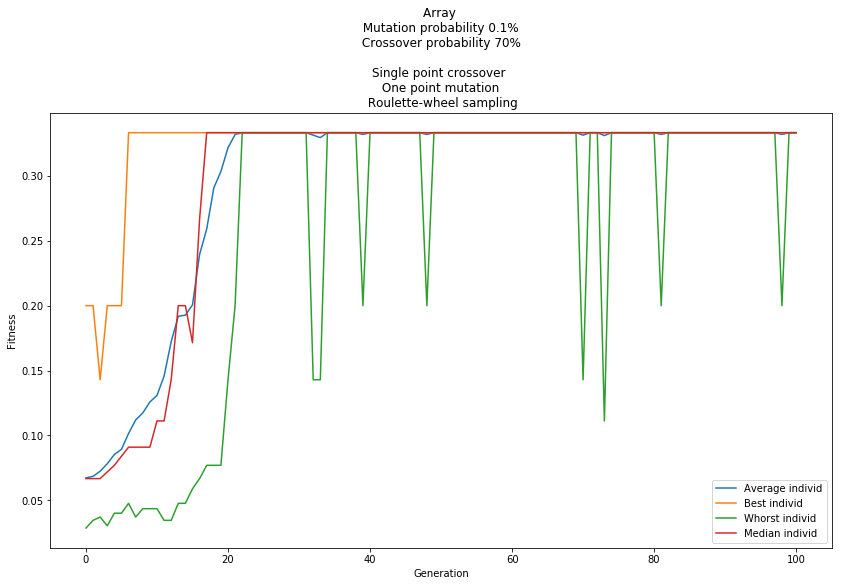

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mx, label='Best individ')
line_min = ax.plot(gen, mn, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Array \n Mutation probability 0.1% \n Crossover probability 70% \n  
Single point crossover \n One point mutation \n Roulette-wheel sampling''')
plt.show()

Genotype is permutation (size 8)  
Population: 100  
Mutation probability: 0.1%  
Crossover probability: 70%  
Terminal conditions 100 generations  
Operators:  
*Crossover: PMX crossover  
*Mutation: Swap mutation  
*Selection: Tournament selection  

In [4]:
import random
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import time

queens = 8

def evaluation(individual):
    size = len(individual)
    sum = 0
    for i in range(size):
        for j in range(i+1, size):
            if individual[i] == individual[j]:
                sum += 2
            elif abs(individual[i] - individual[j])==abs(i-j):
                sum += 2           
    return 1/(1+sum),

def swap_mut(individual): 
    index_one,index_two=random.sample(range(len(individual)),2)
    individual[index_one],individual[index_two]=individual[index_two],individual[index_one]
    return (individual,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("permutation", random.sample, range(queens), queens)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", swap_mut)
toolbox.register("select", tools.selTournament, tournsize=2)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)

before = time.time()
a,v=algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.001, ngen=100, stats=stats,
                            halloffame=hof, verbose=False)
after=time.time() 
avg=v.select("Average")
md=v.select("Median")
mn=v.select("Min")
mx=v.select("Max")
gen=v.select("gen")
print(after-before)

C:\Users\User\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\User\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


0.4762566089630127


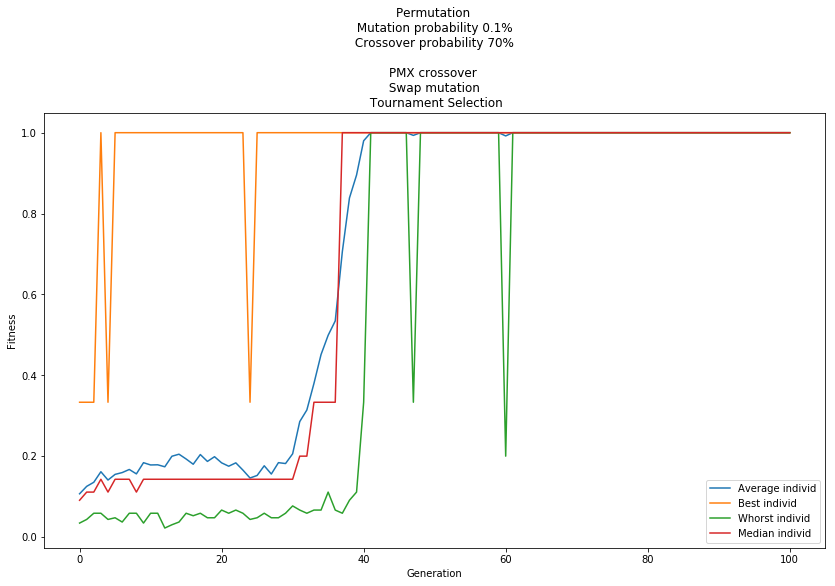

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mx, label='Best individ')
line_min = ax.plot(gen, mn, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Permutation \n Mutation probability 0.1% \n Crossover probability 70% \n  
PMX crossover \n Swap mutation \n Tournament Selection''')
plt.show()

Genotype is permutation (size 8)  
Population: 100  
Mutation probability: 0.1%  
Crossover probability: 40%  
Terminal conditions 100 generations  
Operators:  
*Crossover: PMX crossover  
*Mutation: Swap mutation  
*Selection: Tournament selection  

In [13]:
import random
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import time

queens = 8

def evaluation(individual):
    size = len(individual)
    sum = 0
    for i in range(size):
        for j in range(i+1, size):
            if individual[i] == individual[j]:
                sum += 2
            elif abs(individual[i] - individual[j])==abs(i-j):
                sum += 2           
    return 1/(1+sum),


def swap_mut(individual): 
    index_one,index_two=random.sample(range(len(individual)),2)
    individual[index_one],individual[index_two]=individual[index_two],individual[index_one]
    return (individual,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("permutation", random.sample, range(queens), queens)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", swap_mut)
toolbox.register("select", tools.selTournament, tournsize=2)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)

before = time.time()
a,v=algorithms.eaSimple(pop, toolbox, cxpb=0.4, mutpb=0.001, ngen=100, stats=stats,
                            halloffame=hof, verbose=False)
after=time.time() 
avg=v.select("Average")
md=v.select("Median")
mn=v.select("Min")
mx=v.select("Max")
gen=v.select("gen")
print(after-before)

0.7158806324005127


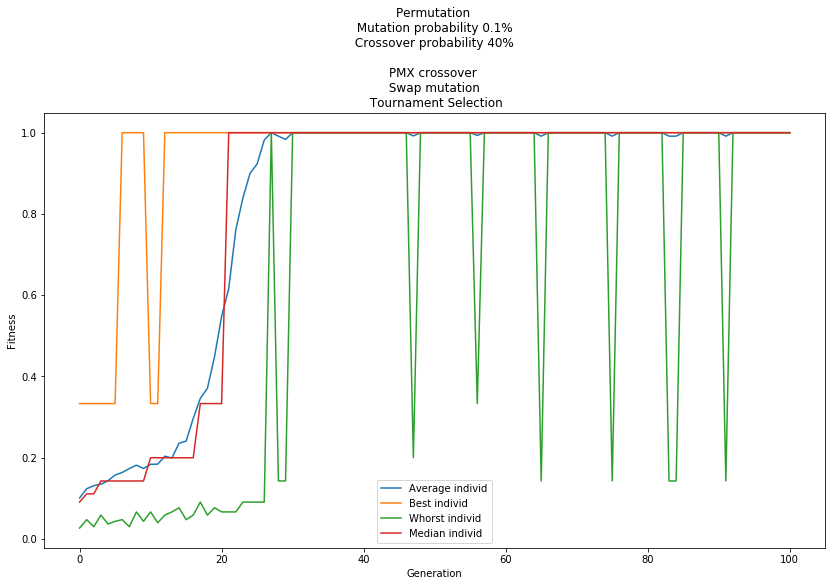

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mx, label='Best individ')
line_min = ax.plot(gen, mn, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Permutation \n Mutation probability 0.1% \n Crossover probability 40% \n  
PMX crossover \n Swap mutation \n Tournament Selection''')
plt.show()

Genotype is permutation (size 8)  
Population: 100  
Mutation probability: 0.1%  
Crossover probability: 10%  
Terminal conditions 100 generations  
Operators:  
*Crossover: PMX crossover  
*Mutation: Swap mutation  
*Selection: Tournament selection 

In [19]:
import random
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import time

queens = 8

def evaluation(individual):
    size = len(individual)
    sum = 0
    for i in range(size):
        for j in range(i+1, size):
            if individual[i] == individual[j]:
                sum += 2
            elif abs(individual[i] - individual[j])==abs(i-j):
                sum += 2           
    return 1/(1+sum),


def swap_mut(individual): 
    index_one,index_two=random.sample(range(len(individual)),2)
    individual[index_one],individual[index_two]=individual[index_two],individual[index_one]
    return (individual,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("permutation", random.sample, range(queens), queens)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", swap_mut)
toolbox.register("select", tools.selTournament, tournsize=2)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)

before = time.time()
a,v=algorithms.eaSimple(pop, toolbox, cxpb=0.1, mutpb=0.001, ngen=100, stats=stats,
                            halloffame=hof, verbose=False)
after=time.time() 
avg=v.select("Average")
md=v.select("Median")
mn=v.select("Min")
mx=v.select("Max")
gen=v.select("gen")
print(after-before)

0.3720698356628418


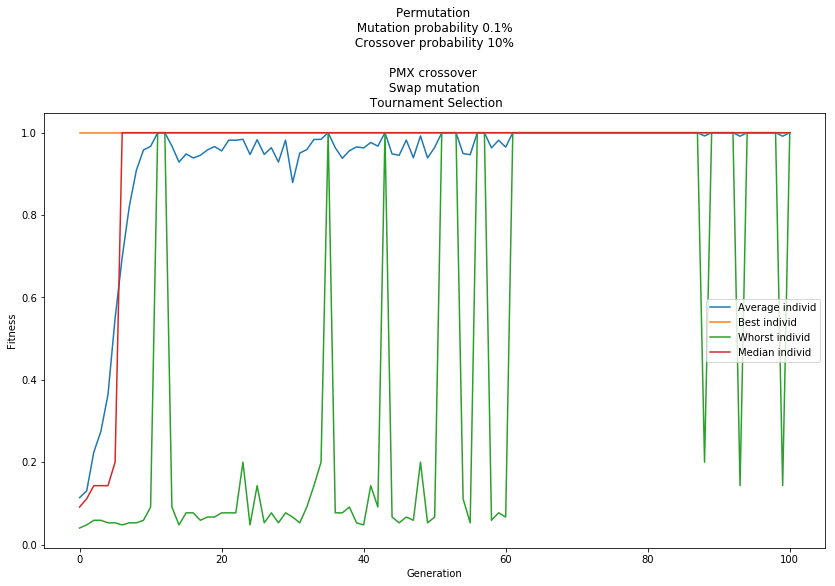

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mx, label='Best individ')
line_min = ax.plot(gen, mn, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Permutation \n Mutation probability 0.1% \n Crossover probability 10% \n  
PMX crossover \n Swap mutation \n Tournament Selection''')
plt.show()

Genotype is permutation (size 8)  
Population: 100  
Mutation probability: 1%  
Crossover probability: 70%  
Terminal conditions 100 generations  
Operators:  
*Crossover: PMX crossover  
*Mutation: Swap mutation  
*Selection: Tournament selection 

In [25]:
import random
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import time

queens = 8

def evaluation(individual):
    size = len(individual)
    sum = 0
    for i in range(size):
        for j in range(i+1, size):
            if individual[i] == individual[j]:
                sum += 2
            elif abs(individual[i] - individual[j])==abs(i-j):
                sum += 2           
    return 1/(1+sum),


def swap_mut(individual): 
    index_one,index_two=random.sample(range(len(individual)),2)
    individual[index_one],individual[index_two]=individual[index_two],individual[index_one]
    return (individual,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("permutation", random.sample, range(queens), queens)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", swap_mut)
toolbox.register("select", tools.selTournament, tournsize=2)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)

before = time.time()
a,v=algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.01, ngen=100, stats=stats,
                            halloffame=hof, verbose=False)
after=time.time() 
avg=v.select("Average")
md=v.select("Median")
mn=v.select("Min")
mx=v.select("Max")
gen=v.select("gen")
print(after-before)

0.518622636795044


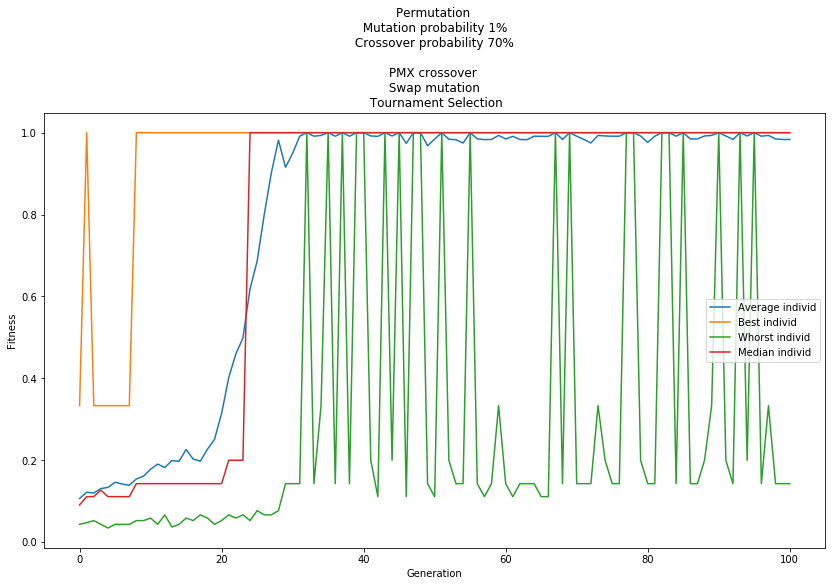

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mx, label='Best individ')
line_min = ax.plot(gen, mn, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Permutation \n Mutation probability 1% \n Crossover probability 70% \n  
PMX crossover \n Swap mutation \n Tournament Selection''')
plt.show()

Genotype is permutation (size 8)  
Population: 100  
Mutation probability: 10%  
Crossover probability: 70%  
Terminal conditions 100 generations  
Operators:  
*Crossover: PMX crossover  
*Mutation: Swap mutation  
*Selection: Tournament selection 

In [31]:
import random
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import time

queens = 8

def evaluation(individual):
    size = len(individual)
    sum = 0
    for i in range(size):
        for j in range(i+1, size):
            if individual[i] == individual[j]:
                sum += 2
            elif abs(individual[i] - individual[j])==abs(i-j):
                sum += 2           
    return 1/(1+sum),

def swap_mut(individual): 
    index_one,index_two=random.sample(range(len(individual)),2)
    individual[index_one],individual[index_two]=individual[index_two],individual[index_one]
    return (individual,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("permutation", random.sample, range(queens), queens)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", swap_mut)
toolbox.register("select", tools.selTournament, tournsize=2)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)

before = time.time()
a,v=algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.1, ngen=100, stats=stats,
                            halloffame=hof, verbose=False)
after=time.time() 
avg=v.select("Average")
md=v.select("Median")
mn=v.select("Min")
mx=v.select("Max")
gen=v.select("gen")
print(after-before)

0.5098857879638672


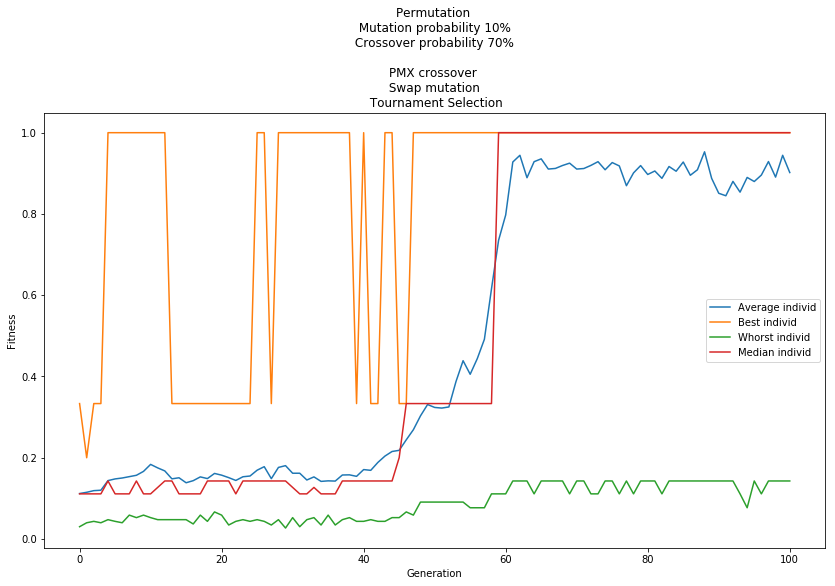

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mx, label='Best individ')
line_min = ax.plot(gen, mn, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Permutation \n Mutation probability 10% \n Crossover probability 70% \n  
PMX crossover \n Swap mutation \n Tournament Selection''')
plt.show()